# Implementing basic ML Algorithms from scratch


----


### Objectives:

- Implement some basic ML Algorithms from scratch not using libraries exept for Numpy:
   - Part 1: Linear Regression
      - Simple LR
      - Multiple LR
      - Polynomial LR
   - Part 2: Logistic Regression
   - Part 3: Neural Network
  




### Context:

This notebook documents my first steps in Machine Learning, guided by my mentor Artem Yankov and the Machine Learning course by Andrew Ng on Coursera. 




-----


### Libraries

In [651]:
import numpy as np
import matplotlib.pyplot as plt
import copy


## Part 1: Linear Regression

### 1. Simple LR

### 1.1 Creating the training set:

In [656]:
## input feature: x
m = 100
x_min = 200
x_max = 2000
np.random.seed(23)  # Seed the random numbers for reproducibility
x_train = np.random.randint(x_min, x_max, size=m)

# contruct the target with noise
a = 0.0003 # quadratic
b = 2      # linear
c = 2000   #intercept

# white noise
noise1 = np.random.uniform(0.5, 1.5, size=m)
noise2 = np.random.uniform(-1, 1, size=m)

# target
y_train = b*noise1*x + a*x*x + c*(1 + .5*noise2)


Text(0.5, 1.0, 'training set values (x,y)')

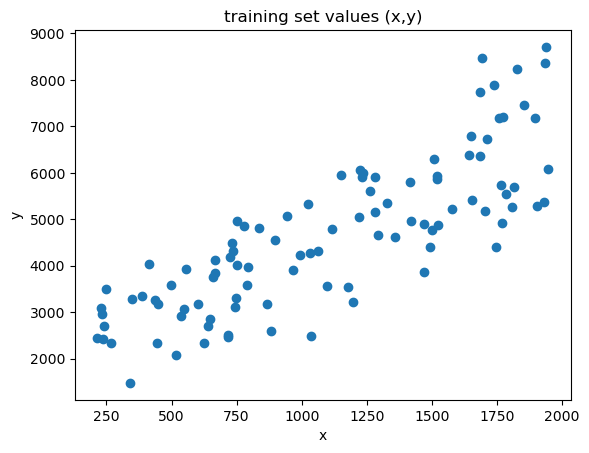

In [658]:
plt.scatter(x_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('training set values (x,y)')

### 1.2 Defining: Cost, Derivatives and Gradient Descent functions

In [661]:
def derivatives(x, y, w, b):
    """ Calculates the cost J and derivatives dj_dw and dj_db."""
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    err = 0
    Jwb = 0
    
    # Calculate the Cost (Jwb) and the Derivatives (dj_dw, dj_db) for a given w and b pair.
    for i in range(m):
        err = w*x[i] + b - y[i]
        dj_dw += err*x[i]
        dj_db += err
        Jwb += err ** 2
    
    Jwb = Jwb/(2*m)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return (dj_dw, dj_db, Jwb)   
    

In [412]:
def gradient_descent(x, y, w_init, b_init, lr, steps, verbose=True):
    """ Follows the gradient descent to fit w and b."""
    
    w = w_init
    b = b_init
    jwb_hist = []  # a list that keep track of each w,b and J values
        
    for i in range(steps):
        dj_dw, dj_db, Jwb = derivatives(x, y, w, b)
        jwb_hist.append([w, b, Jwb])

        if verbose:
            # Print intermediate values
            if i % int(steps/10) == 0:
                print(f'Step {i}: w = {w:8.4f}, b = {b:8.4f}, Jwb = {Jwb:8.4f}')
            
        w = w - lr * dj_dw
        b = b - lr * dj_db
                
    return (w, b, jwb_hist)
    

In [414]:
def cost_function(x, y, w, b):
    """ Calculates the Cost (J) for a given training set (x,y) and model parameters 'w' and 'b'.""" 
    
    m = x.shape[0]
    J = 0
    err = 0
    for i in range(m):
        err += ((x[i]*w + b) - y[i])**2
    J = err / (2*m)

    return J


### 1.3 Appling Simple Linear Regression:

In [665]:
w_init = 0
b_init = 0
lr = 1.1e-6
steps = 10000
w_final_1, b_final_1, jwb_hist_1 = gradient_descent(x_train, y_train, w_init, b_init, lr, steps)
print(60*"-")
print(f'w: {w_final_1:8.4f}\nb: {b_final_1:8.4f}\nCost(J): {jwb_hist_1[-1][-1]:8.4f}')


Step 0: w =   0.0000, b =   0.0000, Jwb = 12110233.7974
Step 1000: w =   3.8944, b =   0.3789, Jwb = 743903.5107
Step 2000: w =   3.8941, b =   0.7548, Jwb = 743775.0359
Step 3000: w =   3.8939, b =   1.1307, Jwb = 743646.6128
Step 4000: w =   3.8936, b =   1.5064, Jwb = 743518.2414
Step 5000: w =   3.8933, b =   1.8821, Jwb = 743389.9217
Step 6000: w =   3.8930, b =   2.2578, Jwb = 743261.6537
Step 7000: w =   3.8928, b =   2.6333, Jwb = 743133.4373
Step 8000: w =   3.8925, b =   3.0088, Jwb = 743005.2725
Step 9000: w =   3.8922, b =   3.3842, Jwb = 742877.1594
------------------------------------------------------------
w:   3.8919
b:   3.7595
Cost(J): 742749.2258




### 1.4 Model Plot

Text(0.5, 1.0, 'Training set and estimated y^')

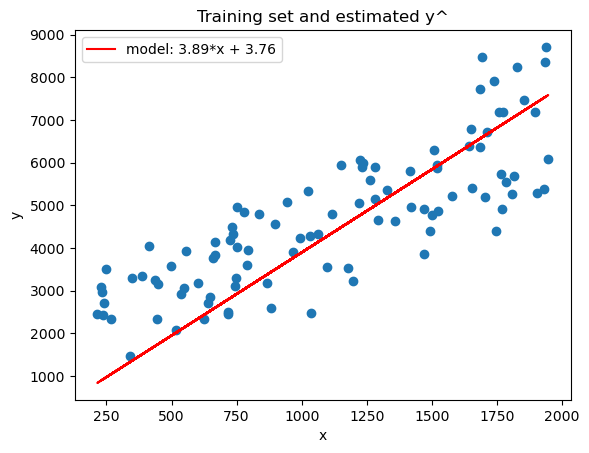

In [667]:
y_pred = [ x*w_final_1 + b_final_1 for x in x_train]
plt.figure(1)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred, color='red', label = f"model: {w_final_1:.2f}*x + {b_final_1:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Training set and estimated y^")


### **1.4.1 Observations**

#### **Observation 1:**
Looking at the line plot, I would suggest that a line with a higher intercept could further minimize the error. Therefore, I will fix a pair of w and b values, calculate the cost J(w,b), and compare the results.


Text(0.5, 1.0, 'Training set and both, the Model y^ and a line defined by observation')

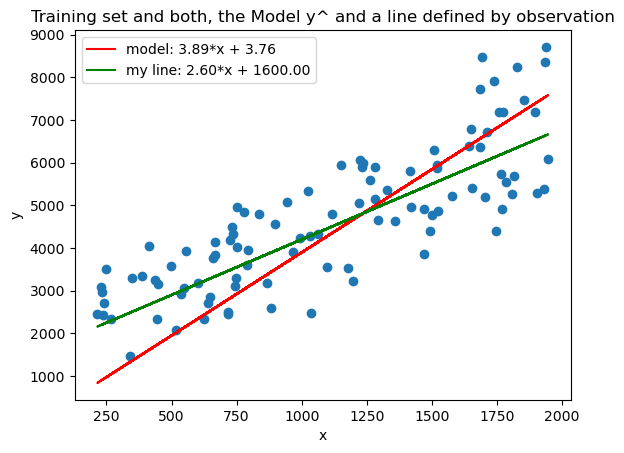

In [682]:
my_w = 2.6
my_b = 1600
my_pred = [ x*my_w + my_b for x in x_train]
plt.figure(1)
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred, color='red', label = f"model: {w_final_1:.2f}*x + {b_final_1:.2f}")
plt.plot(x_train, my_pred, color='green', label = f"my line: {my_w:.2f}*x + {my_b:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Training set and both, the Model y^ and a line defined by observation")

In [684]:
J_mywb = cost_function(x_train, y_train, my_w, my_b)
print("Comparing Costs")
print(f'Model: \t\tw = {w_final_1:8.4f}, b = {b_final_1:8.4f} \t--> J(w,b) = \t {jwb_hist_1[-1][-1]:8.4f} \t (100%)')
print(f'Proposed: \tw = {my_w:8.4f}, b = {my_b:8.4f} \t--> J(w,b) = \t {J_mywb:8.4f}  \t({((J_mywb/jwb_hist_1[-1][-1])*100):3.2f}%)')

Comparing Costs
Model: 		w =   3.8919, b =   3.7595 	--> J(w,b) = 	 742749.2258 	 (100%)
Proposed: 	w =   2.6000, b = 1600.0000 	--> J(w,b) = 	 441011.5785  	(59.38%)


#### -> Finally, we find that the Cost **J** for the proposed pair (w,b) achives a reduction of over 40%

### **Observation 2:**
Let's observe what happens if, instead of initializing **w** and **b** with zero, we set them to values closer to the convergence point.

In [688]:
w_init = 2.2
b_init = 1500
w_final_2, b_final_2, jwb_hist_2 = gradient_descent(x_train, y_train, w_init, b_init, lr, steps) # same LR and steps
print(60*"-")
print(f'w: {w_final_2:8.4f}\nb: {b_final_2:8.4f}\nCost(J): {jwb_hist_2[-1][-1]:8.4f}')

Step 0: w =   2.2000, b = 1500.0000, Jwb = 695572.4907
Step 1000: w =   2.7872, b = 1500.0744, Jwb = 437184.7671
Step 2000: w =   2.7871, b = 1500.1484, Jwb = 437179.7927
Step 3000: w =   2.7871, b = 1500.2223, Jwb = 437174.8204
Step 4000: w =   2.7870, b = 1500.2963, Jwb = 437169.8501
Step 5000: w =   2.7869, b = 1500.3702, Jwb = 437164.8817
Step 6000: w =   2.7869, b = 1500.4441, Jwb = 437159.9154
Step 7000: w =   2.7868, b = 1500.5180, Jwb = 437154.9510
Step 8000: w =   2.7868, b = 1500.5919, Jwb = 437149.9887
Step 9000: w =   2.7867, b = 1500.6658, Jwb = 437145.0284
------------------------------------------------------------
w:   2.7867
b: 1500.7396
Cost(J): 437140.0750


Text(0.5, 1.0, 'The Training Set with Lines from the 1st compute Model, Proposed Model, and 2nd compute Model with different initializations\n')

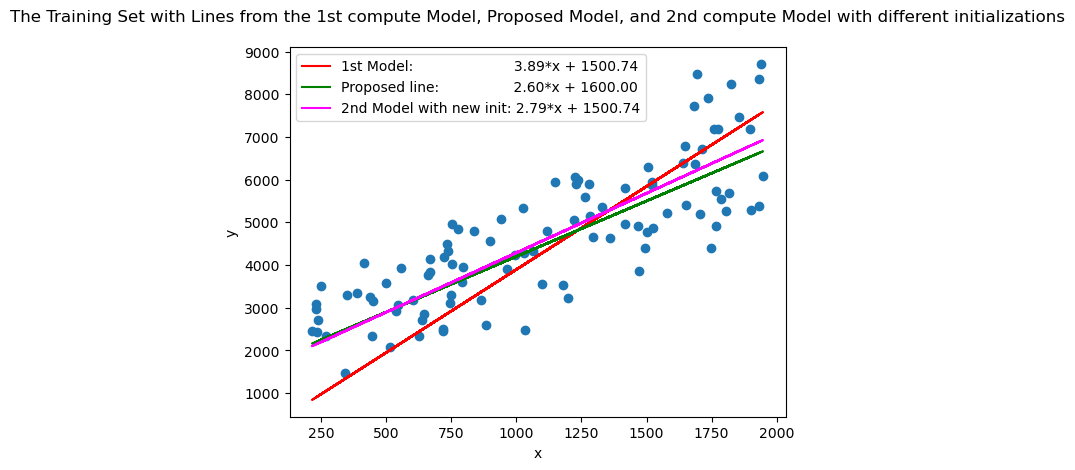

In [690]:
y_pred2 = [ x*w_final_2 + b_final_2 for x in x_train]
plt.figure(1)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred, color='red', label = f"1st Model:                       {w_final_1:.2f}*x + {b_final_2:.2f}")
plt.plot(x_train,my_pred, color='green', label = f"Proposed line:                 {my_w:.2f}*x + {my_b:.2f}")
plt.plot(x_train,y_pred2, color='magenta', label = f"2nd Model with new init: {w_final_2:.2f}*x + {b_final_2:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("The Training Set with Lines from the 1st compute Model, Proposed Model, and 2nd compute Model with different initializations\n")

In [692]:
print("Comparing Costs")
print(f'Model: \tw = {w_final_2:8.4f}, b = {b_final_2:8.4f} \t--> J(w,b) = \t {jwb_hist_2[-1][-1]:8.4f} \t (100%)')
print(f'Fixing: w = {my_w:8.4f}, b = {my_b:8.4f} \t--> J(w,b) = \t {J_mywb:8.4f}  \t({((J_mywb/jwb_hist_2[-1][-1])*100):3.2f}%)')

Comparing Costs
Model: 	w =   2.7867, b = 1500.7396 	--> J(w,b) = 	 437140.0750 	 (100%)
Fixing: w =   2.6000, b = 1600.0000 	--> J(w,b) = 	 441011.5785  	(100.89%)


#### -> Finally, we find that the Cost **J** for the new model parameters is lower.

**Observation 3:** The intercept changes very little comparing with the slope during the gradient descent. I think that scaling the training set could improve this... (I'll try it soon)

### **1.4.2 Compare results**

Following we will compare the model parameters with those compute with the Coursera Andrew Ng course:


In [697]:
import importlib
import LR_AN_functions as ref
importlib.reload(ref)

<module 'LR_AN_functions' from 'C:\\Users\\fpere\\Jupyter_projects\\LR_AN_functions.py'>

In [701]:
# Run the Reference Gradient Descent Computation with w and b equals to zero
w_init = 0 
b_init = 0
w_final_1_ref, b_final_1_ref, J_hist_1_ref, p_hist_1_ref = ref.gradient_descent_AN(x_train ,y_train, 0, 0, lr, 
                                                    steps, ref.compute_cost_AN, ref.compute_gradient_AN)

# Run the Reference Gradient Descent Computation with w_init = 2.2 and b_init = 1500
w_init = 2.2 
b_init = 1500
w_final_2_ref, b_final_2_ref, J_hist_2_ref, p_hist_2_ref = ref.gradient_descent_AN(x_train ,y_train, w_init, b_init, lr, 
                                                    steps, ref.compute_cost_AN, ref.compute_gradient_AN)

print("Compare the obtained parameters (w,b) from different algorithm computations:\n")
print("With w_init = 0 and b_init = 0:")
print(f'This Model: \tw = {w_final_1:8.4f}, b = {b_final_1:8.4f} \t--> J(w,b) = \t {jwb_hist_1[-1][-1]:8.4f}')
print(f'Reference: \tw = {w_final_1_ref:8.4f}, b = {b_final_1_ref:8.4f} \t--> J(w,b) = \t {J_hist_1_ref[-1]:8.4f}')
print(80*"-")
print("With w_init = " + str(w_init) + " and b_init = " + str(b_init))
print(f'This Model: \tw = {w_final_2:8.4f}, b = {b_final_2:8.4f} \t--> J(w,b) = \t {jwb_hist_2[-1][-1]:8.4f}')
print(f'Reference: \tw = {w_final_2_ref:8.4f}, b = {b_final_2_ref:8.4f} \t--> J(w,b) = \t {J_hist_2_ref[-1]:8.4f}')


Compare the obtained parameters (w,b) from different algorithm computations:

With w_init = 0 and b_init = 0:
This Model: 	w =   3.8919, b =   3.7595 	--> J(w,b) = 	 742749.2258
Reference: 	w =   3.8919, b =   3.7595 	--> J(w,b) = 	 742749.0978
--------------------------------------------------------------------------------
With w_init = 2.2 and b_init = 1500
This Model: 	w =   2.7867, b = 1500.7396 	--> J(w,b) = 	 437140.0750
Reference: 	w =   2.7867, b = 1500.7396 	--> J(w,b) = 	 437140.0700


#### The obtained parameters are consistent with those calculated using the reference algorithms.


### 1.5 What happen with **w**, **b**, and **J** during the gradient descent iterations 

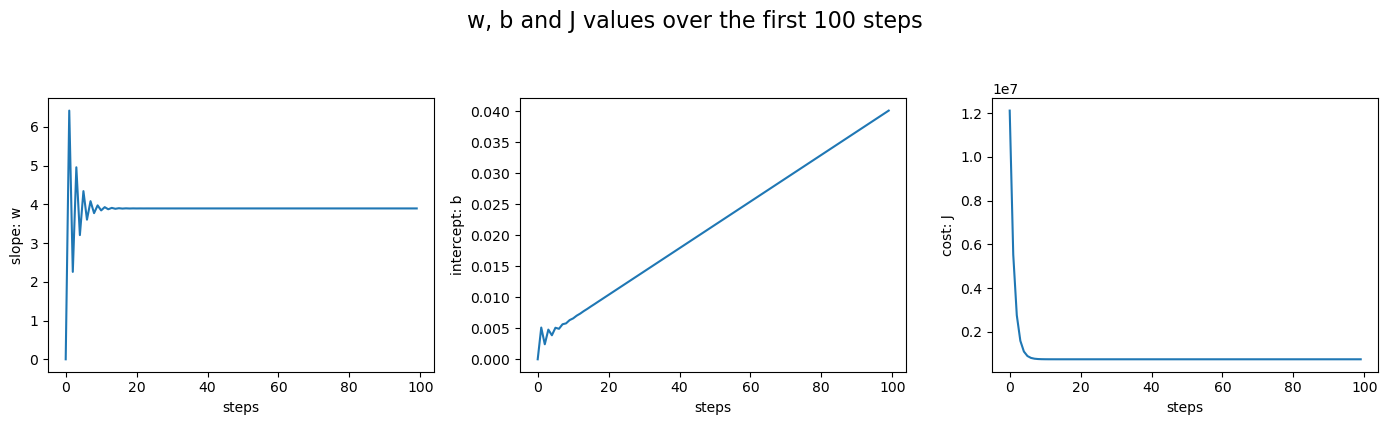

In [705]:
# we present the data for the first Model (with w_init and b_init equals zero)
labels = ['slope: w', 'intercept: b', 'cost: J']
first_steps = 100

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle("w, b and J values over the first " + str(first_steps) + " steps", fontsize=16, y=1.05)

for i in range(len(ax)):
    ax[i].plot(range(first_steps), [line[i] for line in jwb_hist_1[:first_steps]])
    ax[i].set_xlabel('steps')
    ax[i].set_ylabel(labels[i])

plt.tight_layout()
plt.show()


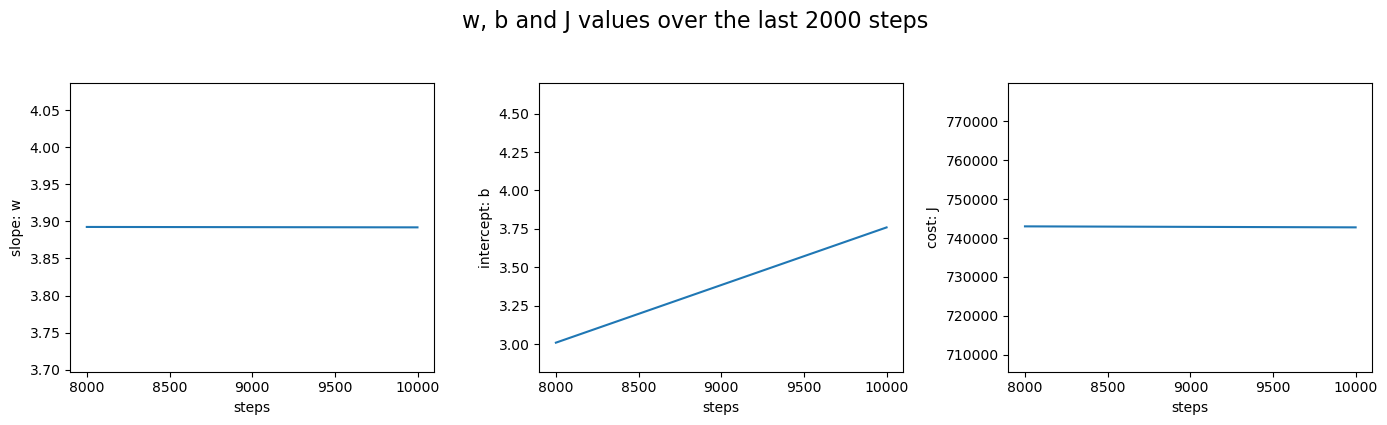

In [707]:
last_steps = 2000

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle("w, b and J values over the last " + str(last_steps) + " steps", fontsize=16, y=1.05)
J = jwb_hist_1[-1][-1]
y_axis_limits = [(w_final_1*.95, w_final_1*1.05), (b_final_1*.75, b_final_1*1.25), (J*.95, J*1.05)]

for i in range(len(ax)):
    ax[i].plot(range(steps-last_steps,steps), [line[i] for line in jwb_hist_1[-last_steps:]])
    ax[i].set_xlabel('steps')
    ax[i].set_ylim(y_axis_limits[i][0],y_axis_limits[i][1])
    ax[i].set_ylabel(labels[i])

plt.tight_layout()
plt.show()

***

### 1.6 Scaling


Considering the small changes applied to the intercept (b) after gradient descent, let's apply mean and z-score normalization as scaling to the training set and observe the results.

#### 1.6.1 Mean and Z-Score Normalization

 Mean Normalization ranges:	  -0.51 < x < 0.49
 Z-Score Normalization ranges:	  -1.70 < x < 1.60


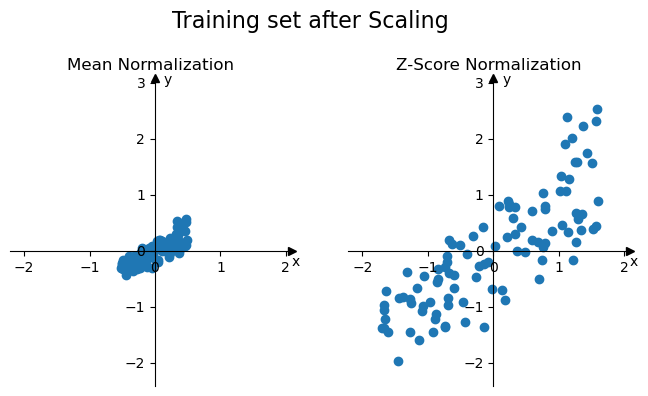

In [728]:
# Features Scaling:
# First, calculate mean and range for the feature values
x_mean = x_train.mean()
x_std = x_train.std()
x_range = x_train.max() - x_train.min()

# Normalize the target, ONLY for ploting porpouses not for computing Gradient Descent
y_mean = y_train.mean()
y_std = y_train.std()
y_range = y_train.max() - y_train.min()
    
# Normalize the training set
# Mean normalization:
x_norm_m = (x_train - x_mean) / x_range
y_norm_m = (y_train - y_mean) / y_range
norm_m_title = "Mean Normalization"
print(f' Mean Normalization ranges:\t  {min(x_norm_m):2.2f} < x < {max(x_norm_m):2.2f}')

# Z-Score normalization:
x_norm_z = (x_train - x_mean) / x_std
y_norm_z = (y_train - y_mean) / y_std
norm_z_title = "Z-Score Normalization"
print(f' Z-Score Normalization ranges:\t  {min(x_norm_z):2.2f} < x < {max(x_norm_z):2.2f}')

# Plot the normalized training set
fig, ax = plt.subplots(1, 2, figsize=(8, 4)) # --> keep y-axis scale for both figures ', sharey=True)'
fig.suptitle("Training set after Scaling", fontsize=16, y=1.05)
x_sets = [x_norm_m, x_norm_z]
y_sets = [y_norm_m, y_norm_z]
sub_titles = [norm_m_title, norm_z_title]

# definir x and y limits for both plots
x_limits = [min(x_norm_m + x_norm_z), max(x_norm_m + x_norm_z)]
y_limits = [min(y_norm_m + y_norm_z), max(y_norm_m + y_norm_z)]

for i in range(len(ax)):
    ax[i].scatter(x_sets[i], y_sets[i])
    ax[i].set_title(sub_titles[i])
    # Set the limits to avoid cut-offs
    ax[i].set_xlim(x_limits[0], x_limits[1])
    ax[i].set_ylim(y_limits[0], y_limits[1])
    # Add labels at the end of the axes using dynamic limits
    ax[i].text(x_limits[1], -0.2, 'x', horizontalalignment='left', verticalalignment='center')
    ax[i].text(0.2, y_limits[1]*.95, 'y', horizontalalignment='center', verticalalignment='bottom')#, rotation='vertical')
    # Set the position of the x and y axis to the center
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')
    # Hide the top and right spines
    ax[i].spines['right'].set_color('none')
    ax[i].spines['top'].set_color('none')
    # Add arrows to the end of the axes
    ax[i].plot(1, 0, ">k", transform=ax[i].get_yaxis_transform(), clip_on=False)
    ax[i].plot(0, 1, "^k", transform=ax[i].get_xaxis_transform(), clip_on=False)
       
plt.show()



- Since the Range of Value is greater than the Standard Deviation, Mean Normalization compresses the relative distances between the feature values more than Z-Score Normalization. Despite this compression, the distribution of the data points maintains the same overall pattern.

#### 1.6.2 Compute LR with Normalization feature


Let's compute the Linear Regression for normalizations and compare the results:


In [835]:
w_init = 0
b_init = 0
# choose a new Learing Rate and # iterations
# Adjusted from 1e-07 to 0.1
lr = 0.1

w_final_MN, b_final_MN, jwb_hist_MN = gradient_descent(x_norm_m, y_train, w_init, b_init, lr, steps, verbose=False)
print(f'lr (alpha): {lr}\tsteps: {steps}')
print(60*"-")
print(f'w: {w_final_MN:8.4f}\nb: {b_final_MN:8.4f}\nCost(J): {jwb_hist_MN[-1][-1]:8.4f}')

lr (alpha): 0.1	steps: 10000
------------------------------------------------------------
w: 4357.5599
b: 4651.2665
Cost(J): 424830.7670


In [837]:
w_final_ZN, b_final_ZN, jwb_hist_ZN = gradient_descent(x_norm_z, y_train, w_init, b_init, lr, steps, verbose=False)
print(f'lr (alpha): {lr}\tsteps: {steps}')
print(60*"-")
print(f'w: {w_final_ZN:8.4f}\nb: {b_final_ZN:8.4f}\nCost(J): {jwb_hist_ZN[-1][-1]:8.4f}')

lr (alpha): 0.1	steps: 10000
------------------------------------------------------------
w: 1317.7730
b: 4651.2665
Cost(J): 424830.7670


It's remarkable to observe that both final intercepts **b** have the same value!

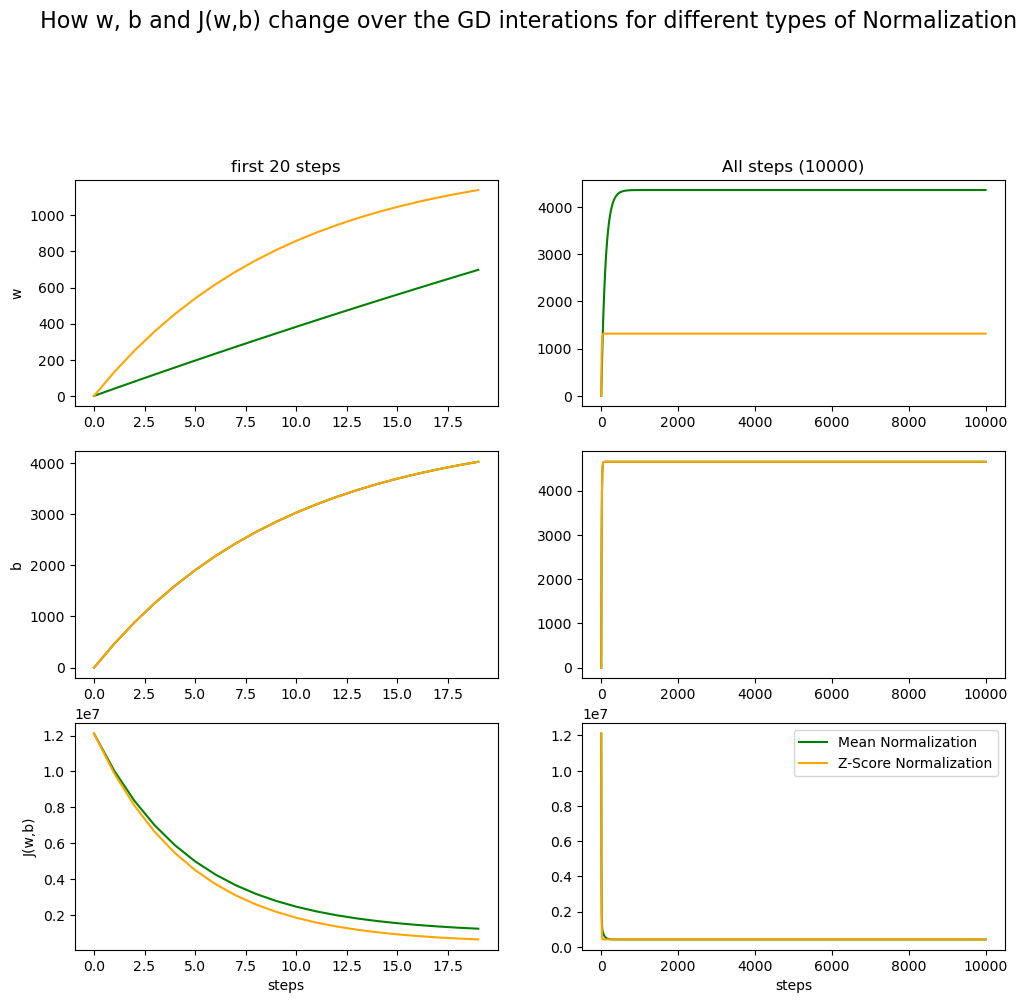

In [940]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle(" How w, b and J(w,b) change over the GD interations for different types of Normalization", fontsize=16, y=1.05)
jwb_hist_norm = [np.array(jwb_hist_MN), np.array(jwb_hist_ZN)]
nb_of_steps = [20, steps]
subplot_titles = ['first ' + str(nb_of_steps[0]) + ' steps', 'All steps (' + str(nb_of_steps[1]) + ')']
y_labels = ['w', 'b', 'J(w,b)']
#ax = ax.flatten()
       
for j in range(len(ax)):
    ax[j][0].set_ylabel(y_labels[j])
    for i in range(len(ax[0])):
        ax[0][i].set_title(subplot_titles[i])
        ax[j][i].plot(range(nb_of_steps[i]), jwb_hist_norm[0][:nb_of_steps[i],j], color='green', label='Mean Normalization')
        ax[j][i].plot(range(nb_of_steps[i]), jwb_hist_norm[1][:nb_of_steps[i],j], color='orange', label='Z-Score Normalization')    
        ax[len(ax[0])][i].set_xlabel('steps')
        #ax[j][i].legend()

# plt.tight_layout()
plt.legend()
plt.show()


Depending on the type of normalization, we observe the following:

-    Different **w** values during the first iterations.
-    Two distinct Cost **J(w,b)** curves. However, after a large number of iterations, both curves converge to the same value.
-    It's surprising that the intercept values **b** remain the same throughout the Gradient Descent steps. Then, I will use the reference Algorithm to Identify any difference.


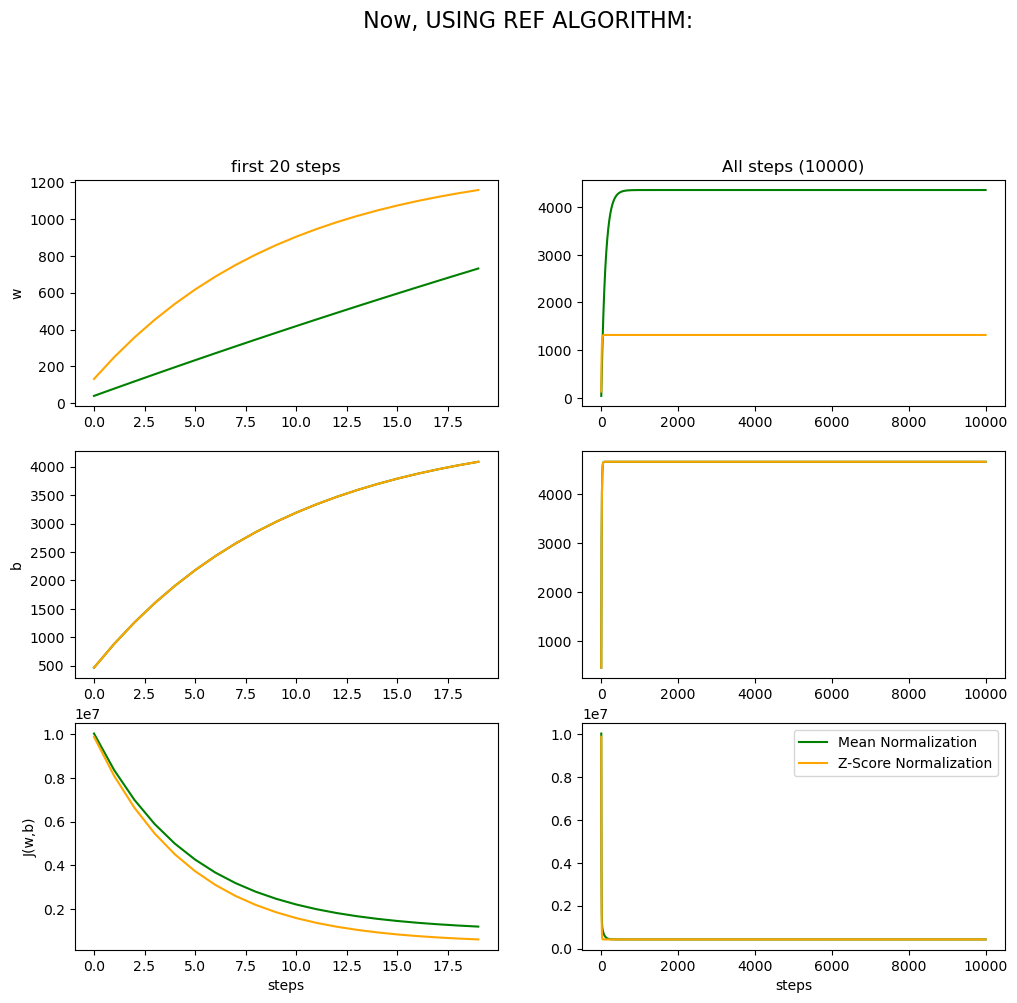

In [1018]:
w_final_MN_ref, b_final_MN_ref, J_hist_MN_ref, p_hist_MN_ref = ref.gradient_descent_AN(x_norm_m ,y_train, w_init, b_init, lr, 
                                                    steps, ref.compute_cost_AN, ref.compute_gradient_AN)
w_final_ZN_ref, b_final_ZN_ref, J_hist_ZN_ref, p_hist_ZN_ref = ref.gradient_descent_AN(x_norm_z ,y_train, w_init, b_init, lr, 
                                                    steps, ref.compute_cost_AN, ref.compute_gradient_AN)

# merging history arrays to plot w, b and J. Mean Normalization.
J_hist_MN_ref = np.array(J_hist_MN_ref).reshape((len(J_hist_MN_ref), 1))
p_hist_MN_ref = np.array(p_hist_MN_ref)
hist_MN_ref = np.hstack((p_hist_MN_ref, J_hist_MN_ref))
# merging history arrays to plot w, b and J. Z-Score Normalization.
J_hist_ZN_ref = np.array(J_hist_ZN_ref).reshape((len(J_hist_ZN_ref), 1))
p_hist_ZN_ref = np.array(p_hist_ZN_ref)
hist_ZN_ref = np.hstack((p_hist_ZN_ref, J_hist_ZN_ref))

#plot
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle(" Now, USING REF ALGORITHM:", fontsize=16, y=1.05)
jwb_hist_norm = [hist_MN_ref, hist_ZN_ref]
nb_of_steps = [20, steps]
subplot_titles = ['first ' + str(nb_of_steps[0]) + ' steps', 'All steps (' + str(nb_of_steps[1]) + ')']
y_labels = ['w', 'b', 'J(w,b)']
     
for j in range(len(ax)):
    ax[j][0].set_ylabel(y_labels[j])
    for i in range(len(ax[0])):
        ax[0][i].set_title(subplot_titles[i])
        ax[j][i].plot(range(nb_of_steps[i]), jwb_hist_norm[0][:nb_of_steps[i],j], color='green', label='Mean Normalization')
        ax[j][i].plot(range(nb_of_steps[i]), jwb_hist_norm[1][:nb_of_steps[i],j], color='orange', label='Z-Score Normalization')    
        ax[len(ax[0])][i].set_xlabel('steps')
plt.legend()
plt.show()

We observe the same values.


#### 1.6.3 Plot Models and compare results


Text(0.5, 1.0, 'Predicted target by the last Model using Z-Score Normalization')

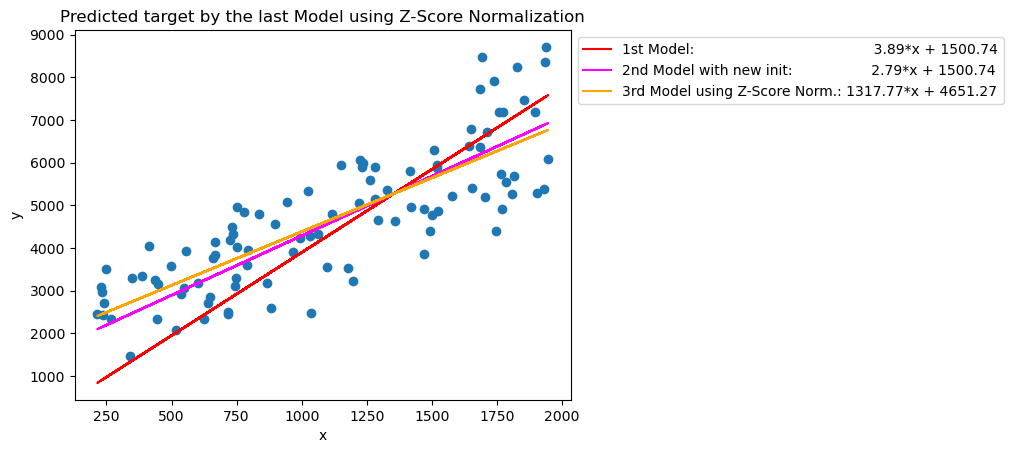

In [1020]:
y_pred_ZN = [ (w_final_ZN*x + b_final_ZN) for x in x_norm_z]
plt.figure(1)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred, color='red', label = f"1st Model:                                         {w_final_1:.2f}*x + {b_final_2:.2f}")
plt.plot(x_train,y_pred2, color='magenta', label = f"2nd Model with new init:                  {w_final_2:.2f}*x + {b_final_2:.2f}")
plt.plot(x_train,y_pred_ZN, color='orange', label = f"3rd Model using Z-Score Norm.: {w_final_ZN:.2f}*x + {b_final_ZN:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Predicted target by the last Model using Z-Score Normalization")



IMPORTANT:

- The effect of using feature scaling is significant. The computation converges to a lower cost **J(w,b)** even when the initial values of **w** and **b** are zero.

***

***


### 2. Multiple LR

### 2.1 Creating the training set for multiple variables:

In [460]:
## input features (x_j)
m = 100

# Define the limits and list of choice for each feature
x_1_lims = [200, 2000]
x_2_lims = [20, 100]
x_3_values = list(range(1, 10))
x_4_values = list(range(1, 4))

# Initialize each feature using ramdom values
np.random.seed(23)  # Seed the random numbers for reproducibility
x_1 = np.random.randint(x_1_lims[0], x_1_lims[1], size=m)
x_2 = np.random.randint(x_2_lims[0], x_1_lims[1], size=m)
x_3 = np.random.choice(x_3_values, size=m)
x_4 = np.random.choice(x_4_values, size=m)

# Coefs to construct the output with noise 
a = 2      #quadratic
b = 0.0003 #linear
c = 2000    #intercept

# White noise
noise1 = np.random.uniform(0.5, 1.5, size=m)
noise2 = np.random.uniform(-1, 1, size=m)

# The output is a polynomial function of the features values with added noise
y = (a*noise1*x_1 + b*(x_1**2) + (.5*a*noise1*x_2 + b*2*(x_2**2)) + (x_3*noise2*100) + (x_4*noise2*300) + c*(1 + .5*noise2)) 

# Convert the four feature vectors in a matrix X (2-D)
X = np.c_[x_1, x_2, x_3, x_4]


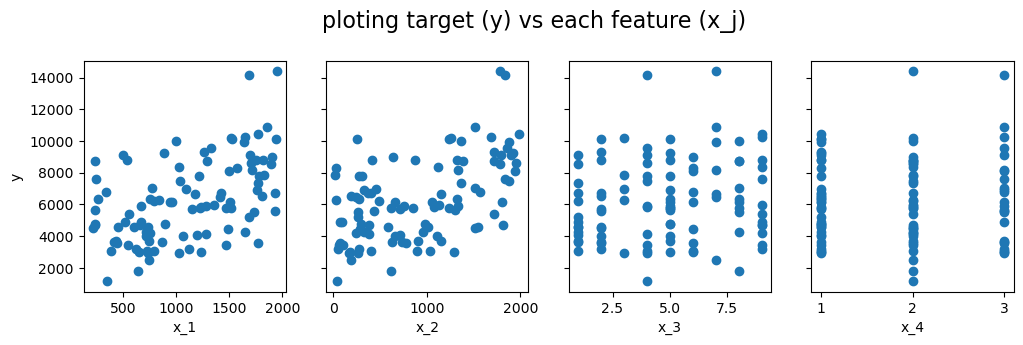

In [462]:
X_features = ['x_1','x_2','x_3','x_4']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
fig.suptitle("ploting target (y) vs each feature (x_j)", fontsize=16, y=1.05)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

### 2.2 Defining: Cost, Derivatives and Gradient Descent functions using Vectors:

In [1045]:
def derivatives_vect(X, y, w, b, lambda_):

    m = X.shape[0]
    n = X.shape[1]

    dj_dw = np.zeros(n)
    dj_db = 0.
    Jwb = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]    
        dj_db += err
        Jwb += err ** 2 

    # Add Regularization
    # to the cost:
    Jwb_reg = 0
    for j in range(n):
        Jwb_reg += w[j]**2
    Jwb_reg = lambda_*Jwb_reg 
    
    # to the derivative
    dj_dw += lambda_*w  

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    Jwb = (Jwb + Jwb_reg) / (2*m)
    
    return (dj_dw, dj_db, Jwb)


def gradient_descent_vect(X, y, w_init, b_init, lr, steps, lambda_, output=True):

    n = X.shape[1]
    w = copy.deepcopy(w_init)  #avoid modifying global w
    b = b_init
    Jwb_hist = []

    for i in range(steps):

        # calculate the derivatives and the Cost J for a given w and b.
        dj_dw, dj_db, Jwb = derivatives_vect(X, y, w, b, lambda_)
        Jwb_hist.append([w, b, Jwb])

        if output:
            # Print intermediate values
            if i % int(steps / 10) == 0:
                np.set_printoptions(formatter={'float_kind': "{:8.4f}".format})
                print(f'Step {i}: w = {w}, b = {b:8.4f}, Jwb = {Jwb:8.4f}')
            
            if i == steps:
                np.set_printoptions(formatter=None)
            
        # update w and b
        w = w - lr * dj_dw
        b = b - lr * dj_db

    return (w, b, Jwb_hist)

            


### 2.3 Compute Gradient Descent

In [1048]:
w_init = np.zeros(X.shape[1])
b_init = 0.
lr = 3e-7
steps = 10000
w_final, b_final, Jwb_hist = gradient_descent_vect(X, y, w_init, b_init, lr, steps, 0, output=True)
print(60*"-")
print(f'w: {w_final}\nb: {b_final:8.4f}\nCost(J): {Jwb_hist[-1][-1]:8.4f}')
# note: lr=1e-6 and steps=1000
    

Step 0: w = [  0.0000   0.0000   0.0000   0.0000], b =   0.0000, Jwb = 22899119.2465
Step 1000: w = [  3.2870   2.7145   0.3381   0.0575], b =   0.0519, Jwb = 1514790.0359
Step 2000: w = [  3.2862   2.7138   0.6624   0.1099], b =   0.1011, Jwb = 1514422.2525
Step 3000: w = [  3.2854   2.7131   0.9857   0.1622], b =   0.1503, Jwb = 1514056.5530
Step 4000: w = [  3.2845   2.7124   1.3082   0.2144], b =   0.1994, Jwb = 1513692.9253
Step 5000: w = [  3.2837   2.7117   1.6297   0.2664], b =   0.2484, Jwb = 1513331.3578
Step 6000: w = [  3.2829   2.7111   1.9502   0.3183], b =   0.2974, Jwb = 1512971.8385
Step 7000: w = [  3.2821   2.7104   2.2699   0.3700], b =   0.3463, Jwb = 1512614.3559
Step 8000: w = [  3.2813   2.7097   2.5886   0.4216], b =   0.3952, Jwb = 1512258.8983
Step 9000: w = [  3.2805   2.7090   2.9064   0.4730], b =   0.4440, Jwb = 1511905.4542
------------------------------------------------------------
w: [  3.2797   2.7084   3.2233   0.5243]
b:   0.4928
Cost(J): 1511554.3

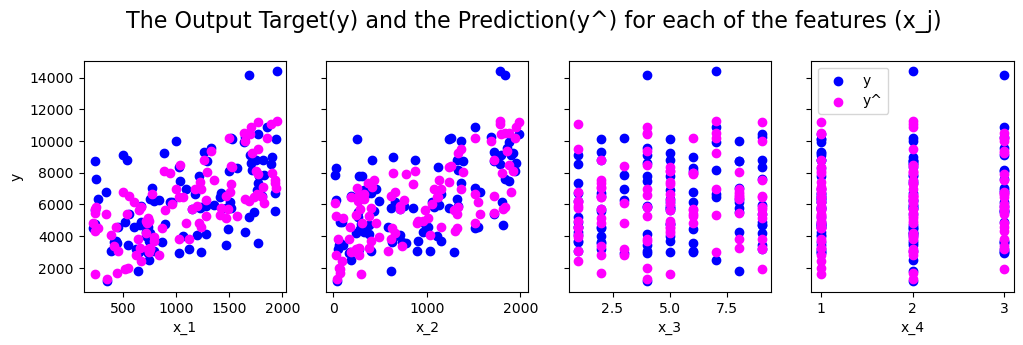

In [1050]:
y_pred = [ (np.dot(X[i], w_final) + b_final) for i in range(m)]
X_features = ['x_1','x_2','x_3','x_4']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
fig.suptitle("The Output Target(y) and the Prediction(y^) for each of the features (x_j)", fontsize=16, y=1.05)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y, color = 'blue', label = "y")
    ax[i].scatter(X[:,i],y_pred, color = 'magenta', label = "y^")
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
ax[len(ax)-1].legend()
plt.show()


----

### 2.4 Analyze the effects on Cost (Jwb) depending on the Learning Rate and the Number of Steps

In [1054]:
steps_list = [3, 10, 100, 1000, 10000]
lr_list = [3e-7, 1e-7, 3e-8, 1e-8, 3e-9, 1e-9]
lr_list = lr_list[::-1]  # reverse
lr_limit_list = [3e-5, 1e-6]

w_init = np.zeros(X.shape[1])
b_init = 0.

J_map = [[gradient_descent_vect(X, y, w_init, b_init, lr, steps, 0, output=False)[2][-1][-1] for steps in steps_list ] for lr in lr_list]


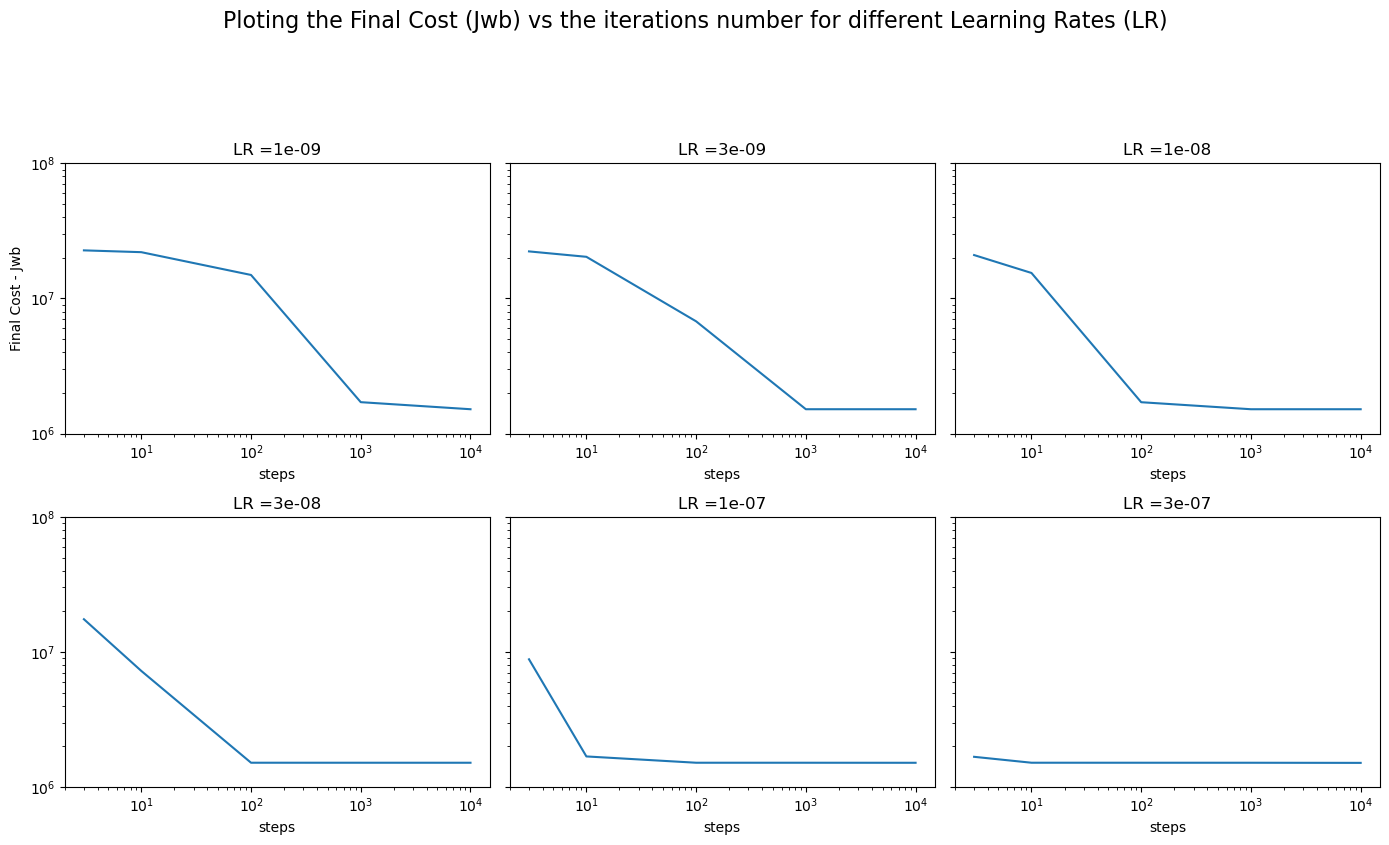

In [1056]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
fig.suptitle("Ploting the Final Cost (Jwb) vs the iterations number for different Learning Rates (LR)", fontsize=16, y=1.05)
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].plot(steps_list,J_map[i])
    ax[i].set_title("LR =" + str(lr_list[i]))
    ax[i].set_xticks(steps_list)
    ax[i].set_xscale('log') 
    ax[i].set_xlabel("steps")
    ax[i].set_yscale('log')
    ax[i].set_ylim(10**6,10**8)
ax[0].set_ylabel("Final Cost - Jwb")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()


#### Analyzing learning rates from 1e-09 to 1e-07, I can conclude that the larger the learning rate, the faster the convergence. However, excessively large learning rates can compromise the stability of gradient descent. The following graphs illustrate this effect:

In [1059]:
steps_limit_list = [3, 10, 100]
lr_limit_list = [6e-7, 9e-7]

w_init = np.zeros(X.shape[1])
b_init = 0.

J_map = [[gradient_descent_vect(X, y, w_init, b_init, lr, steps, 0, output=False)[2][-1][-1] for steps in steps_limit_list ] for lr in lr_limit_list]

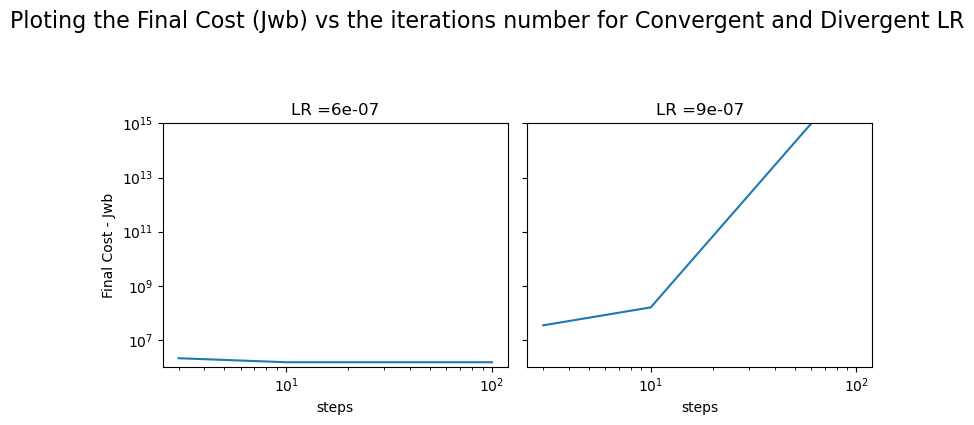

In [1061]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle("Ploting the Final Cost (Jwb) vs the iterations number for Convergent and Divergent LR", fontsize=16, y=1.05)
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].plot(steps_limit_list,J_map[i])
    ax[i].set_title("LR =" + str(lr_limit_list[i]))
    ax[i].set_xticks(steps_limit_list)
    ax[i].set_xscale('log') 
    ax[i].set_xlabel("steps")
    ax[i].set_yscale('log')
    ax[i].set_ylim(10**6,10**15)
ax[0].set_ylabel("Final Cost - Jwb")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()


### 2.5 Use Regularization and compare results.

In [1066]:
w_init = np.zeros(X.shape[1])
b_init = 0.
lr = 3e-7
steps = 10000
lambda_ = 1
w_final_regu, b_final_regu, Jwb_hist_regu = gradient_descent_vect(X, y, w_init, b_init, lr, steps, lambda_, output=True)
print(60*"-")
print(f'w: {w_final_regu}\nb: {b_final_regu:8.4f}\nCost(J): {Jwb_hist_regu[-1][-1]:8.4f}')
# note: lr=1e-6 and steps=1000
    

Step 0: w = [  0.0000   0.0000   0.0000   0.0000], b =   0.0000, Jwb = 22899119.2465
Step 1000: w = [  3.2870   2.7145   0.3381   0.0575], b =   0.0519, Jwb = 1514790.1279
Step 2000: w = [  3.2862   2.7138   0.6624   0.1099], b =   0.1011, Jwb = 1514422.3478
Step 3000: w = [  3.2854   2.7131   0.9857   0.1622], b =   0.1503, Jwb = 1514056.6536
Step 4000: w = [  3.2845   2.7124   1.3082   0.2144], b =   0.1994, Jwb = 1513693.0334
Step 5000: w = [  3.2837   2.7117   1.6296   0.2664], b =   0.2484, Jwb = 1513331.4753
Step 6000: w = [  3.2829   2.7111   1.9502   0.3183], b =   0.2974, Jwb = 1512971.9677
Step 7000: w = [  3.2821   2.7104   2.2698   0.3700], b =   0.3463, Jwb = 1512614.4987
Step 8000: w = [  3.2813   2.7097   2.5886   0.4216], b =   0.3952, Jwb = 1512259.0568
Step 9000: w = [  3.2805   2.7090   2.9064   0.4730], b =   0.4440, Jwb = 1511905.6302
------------------------------------------------------------
w: [  3.2797   2.7084   3.2233   0.5243]
b:   0.4928
Cost(J): 1511554.5

Comparing with previous computing:

In [1069]:
print(60*"-")
print(f'w: {w_final}\nb: {b_final:8.4f}\nCost(J): {Jwb_hist[-1][-1]:8.4f}')

------------------------------------------------------------
w: [  3.2797   2.7084   3.2233   0.5243]
b:   0.4928
Cost(J): 1511554.3624
